## Libraries

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout, BatchNormalization,Activation
from keras.models import Sequential
from keras import optimizers
from keras import regularizers
from sklearn.model_selection import train_test_split
import cv2


In [20]:
print(os.listdir("../input"))

['sign-language']


In [3]:
from google.colab import drive
drive.mount('/content/drive')
train_dir = '/content/drive/My Drive/data/train/asl_alphabet_train'
test_dir = '/content/drive/My Drive/data/val/asl_alphabet_test'

## Loading Train Data

unique_labels =  ['N', '7', 'R', 'space', '2', 'B', 'I', 'del', 'F', 'H', '5', 'E', 'U', 'M', '8', 'X', '0', 'K', 'Q', 'Y', 'S', 'G', 'A', 'O', 'T', 'V', 'Z', '3', '1', 'C', '4', 'P', '9', 'L', '6', 'W', 'D', 'nothing', 'J']


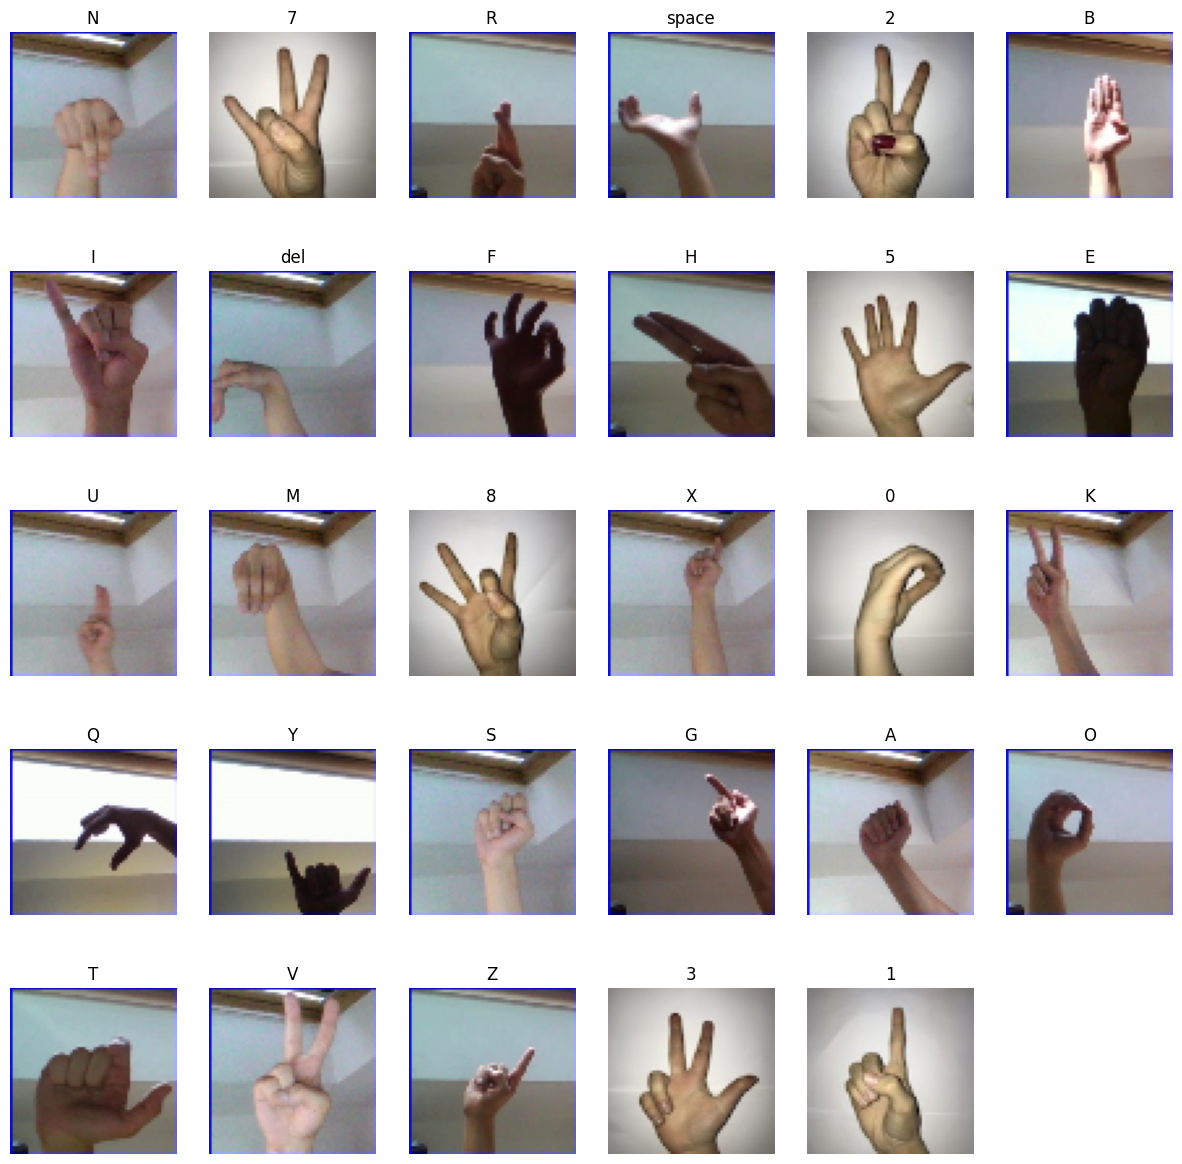

In [18]:
def load_unique():
    size_img = 64,64 
    images_for_plot = []
    labels_for_plot = []
    for folder in os.listdir(train_dir):
        for file in os.listdir(train_dir + '/' + folder):
            filepath = train_dir + '/' + folder + '/' + file
            image = cv2.imread(filepath)
            final_img = cv2.resize(image, size_img)
            final_img = cv2.cvtColor(final_img, cv2.COLOR_BGR2RGB)
            images_for_plot.append(final_img)
            labels_for_plot.append(folder)
            break
    return images_for_plot, labels_for_plot

images_for_plot, labels_for_plot = load_unique()
print("unique_labels = ", labels_for_plot)

fig = plt.figure(figsize = (15,15))
def plot_images(fig, image, label, row, col, index):
    fig.add_subplot(row, col, index)
    plt.axis('off')
    plt.imshow(image)
    plt.title(label)
    return
image_index = 0
row = 5
col = 6
for i in range(1,(row*col)):
    plot_images(fig, images_for_plot[image_index], labels_for_plot[image_index], row, col, i)
    image_index = image_index + 1
plt.show()

In [5]:
labels_dict = {'0':0, '1':1, '2':2, '3':3, '4':4, '5':5, '6':6, '7':7, '8':8, '9':9, 'A':10,'B':11,'C':12,'D':13,'E':14,
               'F':15,'G':16,'H':17,'I':18,'J':19,'K':20,'L':21,'M':22,'N':23,'O':24,'P':25,'Q':26,'R':27,'S':28,'T':29,
               'U':30,'V':31,'W':32,'X':33,'Y':34,'Z':35,'space':36,'del':37,'nothing':38}

def load_data():
    i = 0
    images = []
    labels = []
    size = 64,64
    print("LOADING DATA FROM : ",end = "")
    
    for folder in os.listdir(train_dir):
        
            print(folder, end = ' | ')
            for image in os.listdir(train_dir + "/" + folder):
                temp_img = cv2.imread(train_dir + '/' + folder + '/' + image)
                temp_img = cv2.resize(temp_img, size)
                images.append(temp_img)
                labels.append(labels_dict[folder])
    
    images = np.array(images)
    
    images = images.astype('float32')/255.0
    
    labels = keras.utils.to_categorical(labels)
    
    X_train, X_test, Y_train, Y_test = train_test_split(images, labels, test_size = 0.05)
    
    print()
    print('Loaded', len(X_train),'images for training,','Train data shape =',X_train.shape)
    print('Loaded', len(X_test),'images for testing','Test data shape =',X_test.shape)
    
    
    return X_train, X_test, Y_train, Y_test
    


In [6]:
X_train, X_test, Y_train, Y_test = load_data()


LOADING DATA FROM : N | 7 | R | space | 2 | B | I | del | F | H | 5 | E | U | M | 8 | X | 0 | K | Q | Y | S | G | A | O | T | V | Z | 3 | 1 | C | 4 | P | 9 | L | 6 | W | D | nothing | J | 
Loaded 84412 images for training, Train data shape = (84412, 64, 64, 3)
Loaded 4443 images for testing Test data shape = (4443, 64, 64, 3)


## Create Model

In [7]:
def create_model():    
    model = Sequential()
    
    model.add(Conv2D(16, kernel_size = [3,3], padding = 'same', activation = 'relu', input_shape = (64,64,3)))
    model.add(Conv2D(32, kernel_size = [3,3], padding = 'same', activation = 'relu'))
    model.add(MaxPool2D(pool_size = [3,3]))
    
    model.add(Conv2D(32, kernel_size = [3,3], padding = 'same', activation = 'relu'))
    model.add(Conv2D(64, kernel_size = [3,3], padding = 'same', activation = 'relu'))
    model.add(MaxPool2D(pool_size = [3,3]))
    
    model.add(Conv2D(128, kernel_size = [3,3], padding = 'same', activation = 'relu'))
    model.add(Conv2D(256, kernel_size = [3,3], padding = 'same', activation = 'relu'))
    model.add(MaxPool2D(pool_size = [3,3]))
    
    model.add(BatchNormalization())
    
    model.add(Flatten())
    model.add(Dropout(0.5))
    model.add(Dense(512, activation = 'relu', kernel_regularizer = regularizers.l2(0.001)))
    model.add(Dense(39, activation = 'softmax'))
    model.compile(optimizer = 'adam', loss = keras.losses.categorical_crossentropy, metrics = ["accuracy"])
    
    print("MODEL CREATED")
    model.summary()
    
    return model

def fit_model():
    model_hist = model.fit(X_train, Y_train, batch_size = 8, epochs = 5, validation_split = 0.2)
    return model_hist 

In [8]:
model = create_model()
curr_model_hist = fit_model()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


MODEL CREATED


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 64, 64, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 64, 64, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 21, 21, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 21, 21, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 21, 21, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 7, 7, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 7, 7, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 2, 2, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 2, 2, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 39)             │        20,007 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 947,687 (3.62 MB)

 Trainable params: 947,175 (3.61 MB)

 Non-trainable params: 512 (2.00 KB)

Epoch 1/5
  30/8442 ━━━━━━━━━━━━━━━━━━━━ 44s 5ms/step - accuracy: 0.0282 - loss: 4.3611      

I0000 00:00:1713108107.527258      91 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1713108107.547903      91 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


8442/8442 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5807 - loss: 1.8039

W0000 00:00:1713108141.391112      91 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


8442/8442 ━━━━━━━━━━━━━━━━━━━━ 49s 5ms/step - accuracy: 0.5808 - loss: 1.8038 - val_accuracy: 0.9454 - val_loss: 0.5636
Epoch 2/5
8442/8442 ━━━━━━━━━━━━━━━━━━━━ 31s 4ms/step - accuracy: 0.9246 - loss: 0.6101 - val_accuracy: 0.9847 - val_loss: 0.3721
Epoch 3/5
8442/8442 ━━━━━━━━━━━━━━━━━━━━ 31s 4ms/step - accuracy: 0.9556 - loss: 0.4324 - val_accuracy: 0.9794 - val_loss: 0.3061
Epoch 4/5
8442/8442 ━━━━━━━━━━━━━━━━━━━━ 31s 4ms/step - accuracy: 0.9665 - loss: 0.3439 - val_accuracy: 0.9902 - val_loss: 0.2513
Epoch 5/5
8442/8442 ━━━━━━━━━━━━━━━━━━━━ 31s 4ms/step - accuracy: 0.9724 - loss: 0.2895 - val_accuracy: 0.9913 - val_loss: 0.2088


### Evaluation Model

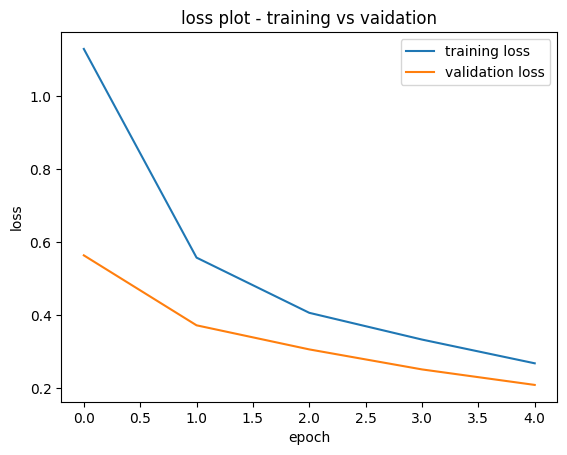

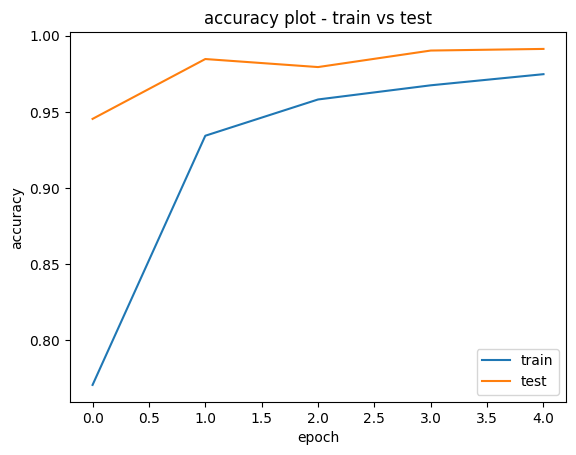

In [22]:
# loss plot - training vs vaidation
plt.plot(curr_model_hist.history['loss'])
plt.plot(curr_model_hist.history['val_loss'])
plt.legend(['training loss', 'validation loss'], loc = 'upper right')
plt.title('loss plot - training vs vaidation')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

# accuracy plot - train vs test
plt.plot(curr_model_hist.history['accuracy'])
plt.plot(curr_model_hist.history['val_accuracy'])
plt.legend(['train', 'test'], loc='lower right')
plt.title('accuracy plot - train vs test')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [10]:
evaluate_metrics = model.evaluate(X_test, Y_test)
print("\nEvaluation Accuracy = ", "{:.2f}%".format(evaluate_metrics[1]*100),"\nEvaluation loss = " ,"{:.6f}".format(evaluate_metrics[0]))

 61/139 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9914 - loss: 0.2004

W0000 00:00:1713108274.134189      90 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


139/139 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.9901 - loss: 0.2068

Evaluation Accuracy =  98.99% 
Evaluation loss =  0.209133


W0000 00:00:1713108275.872766      92 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


## Loading Test Data

In [11]:
def load_test_data():
    images = []
    names = []
    size = 64,64
    for image in os.listdir(test_dir):
        temp = cv2.imread(test_dir + '/' + image)
        temp = cv2.resize(temp, size)
        images.append(temp)
        names.append(image)
    images = np.array(images)
    images = images.astype('float32')/255.0
    return images, names

test_images, test_img_names = load_test_data()

In [14]:
predictions = [np.argmax(model.predict(image.reshape(1,64,64,3))) for image in test_images]


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 542ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━

In [15]:
def get_labels_for_plot(predictions):
    predictions_labels = []
    for i in range(len(predictions)):
        for ins in labels_dict:
            if predictions[i] == labels_dict[ins]:
                predictions_labels.append(ins)
                break
    return predictions_labels

predictions_labels_plot = get_labels_for_plot(predictions)

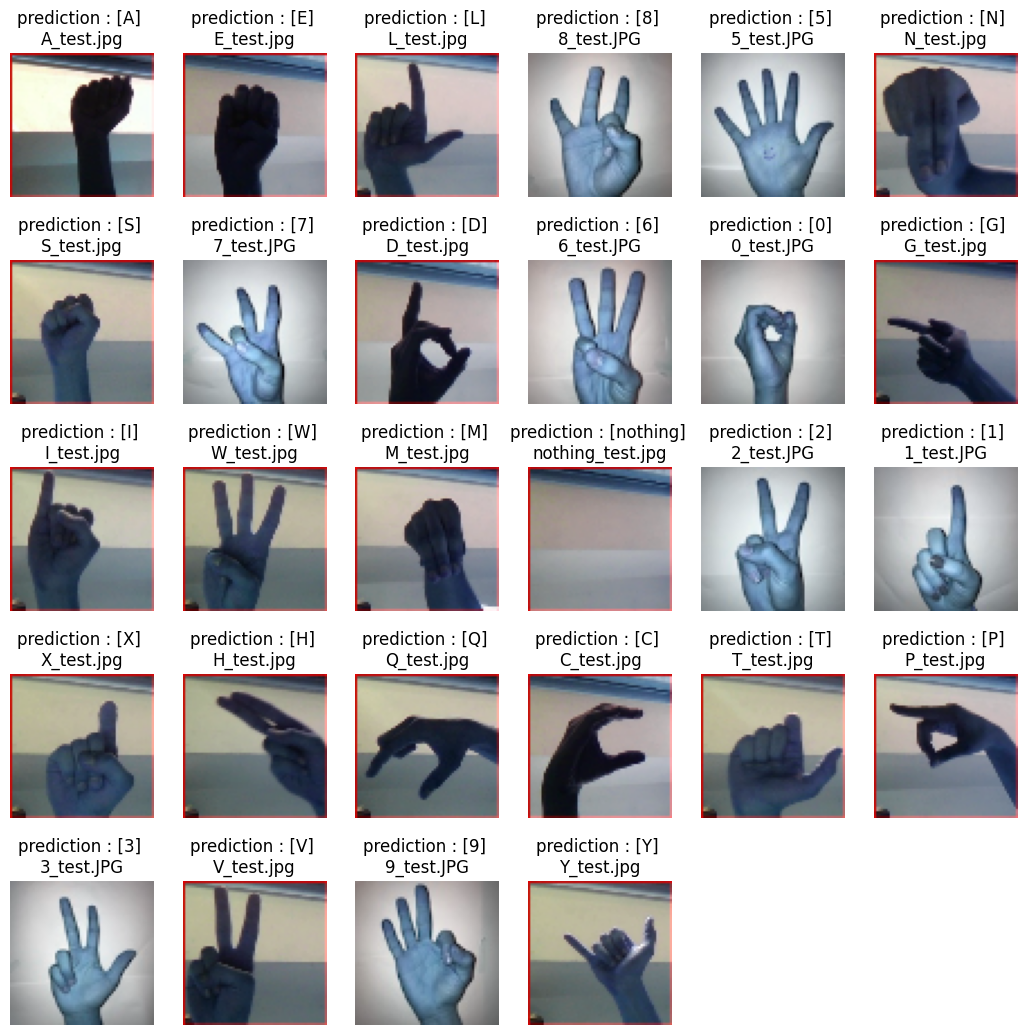

In [16]:
predfigure = plt.figure(figsize = (13,13))
def plot_image_1(fig, image, label, prediction, predictions_label, row, col, index):
    fig.add_subplot(row, col, index)
    plt.axis('off')
    plt.imshow(image)
    title = "prediction : [" + str(predictions_label) + "] "+ "\n" + label
    plt.title(title)
    return

image_index = 0
row = 5
col = 6
for i in range(1,(row*col-1)):
    plot_image_1(predfigure, test_images[image_index], test_img_names[image_index], predictions[image_index], predictions_labels_plot[image_index], row, col, i)
    image_index = image_index + 1
plt.show()

## Save Model

In [17]:
model.save('model.h5')